In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def My_fft2d(img, shift=True):
    '''
    输入：
        img: 归一化后图像
        shift: 
            bool type
            if 'False': no shifting operation 
    
    输出：
        img_fft: img的2d fourier 变换后结果
    '''
    img_fft = np.fft.fft2(img)
    if shift:
        img_fft = np.fft.fftshift(img_fft)

    return img_fft

def My_ifft2d(img_fft, shift=True):
    '''
    输入：
        img_fft: fft 后图像
        shift: 
            bool type
            if 'False': no shifting operation 
    
    输出：
        img_rec: fft 反变换后重建图像
    '''
    if shift:
        img_fft = np.fft.fftshift(img_fft)
    img_rec = np.fft.ifft2(img_fft)
    

    return img_rec

## 关于频率域核函数
不同于空间核矩阵$h(x,y)$可以与输入图像$f(x,y)$有不同的大小, 频率域上核矩阵$H(u,v)$ **必须**与$f(x,y)$ 有相同的大小.

In [3]:
img = plt.imread('translated_rectangle.tif')
np.max(img)

255

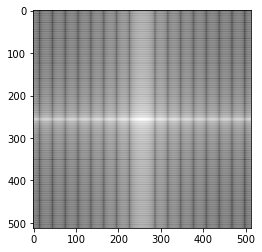

In [4]:
img = img/255 # 归一化
img_ft = My_fft2d(img, shift=True) # FT + shift
plt.imshow(np.log(abs(img_ft)), cmap='gray') # 谱图

## 如何生成H ？

可以使用`np.linspace` 和 `np.meshgrid`的组合

In [6]:
h,w = img.shape
center = h/2, w/2
u_grid = np.linspace(0, h-1 ,h)
v_grid = np.linspace(0, w-1, w)
grid = np.meshgrid(u_grid, v_grid) # 生成2维网格坐标

In [7]:
grid  #注意：grid[0] 给出了列标， grid[1] 给出了行标

[array([[  0.,   1.,   2., ..., 509., 510., 511.],
        [  0.,   1.,   2., ..., 509., 510., 511.],
        [  0.,   1.,   2., ..., 509., 510., 511.],
        ...,
        [  0.,   1.,   2., ..., 509., 510., 511.],
        [  0.,   1.,   2., ..., 509., 510., 511.],
        [  0.,   1.,   2., ..., 509., 510., 511.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  2.,   2.,   2., ...,   2.,   2.,   2.],
        ...,
        [509., 509., 509., ..., 509., 509., 509.],
        [510., 510., 510., ..., 510., 510., 510.],
        [511., 511., 511., ..., 511., 511., 511.]])]

In [8]:
dist_img = (grid[1]-center[0])**2 + (grid[0]-center[1])**2  # 在（u，v）格点上计算 D(u,v)
H = np.where(dist_img<=100, 1, 0) # 理想低通滤波核， D0**2 = 10, 可以尝试变换这个参数观察结果的变化。   

### 检查$H$的样子

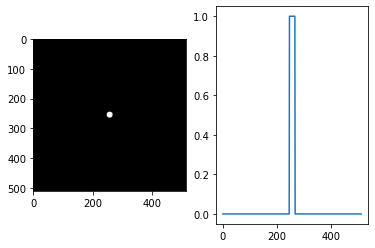

In [9]:
plt.subplot(1,2,1)
plt.imshow(H, cmap='gray')
plt.subplot(1,2,2)
plt.plot(H[int(center[0]), :])

### 频率域滤波的标准流程

In [10]:
img = img/255 # 归一化
img_ft = My_fft2d(img, shift=True) #正变换： FT + shift 
img_HF = H*img_ft # 空间滤波
img_ift = My_ifft2d(img_HF, shift=True) #反变换： shift + IFT 
img_rec = np.real(img_ift) # 后期处理

### 显示图像

Text(0.5, 1.0, 'After ILPF')

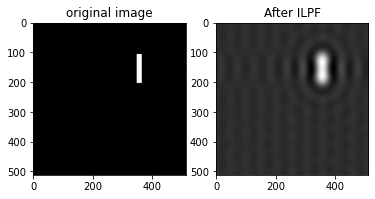

In [11]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(img_rec, cmap='gray')
plt.title('After ILPF')

## 关于补零操作

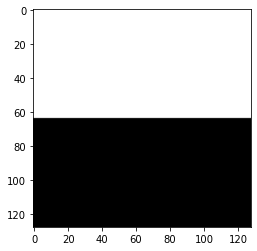

In [21]:
Img = np.zeros((128,128))
Img[:64,:] = 1
plt.imshow(Img, cmap='gray')

In [16]:
def kernel_H(img, D0=100):
    h,w = img.shape
    center = h/2, w/2
    u_grid = np.linspace(0, h-1 ,h)
    v_grid = np.linspace(0, w-1, w)
    grid = np.meshgrid(u_grid, v_grid) # 生成2维网格坐标
    
    dist_img = (grid[1]-center[0])**2 + (grid[0]-center[1])**2  
    H = np.where(dist_img<=D0, 1, 0)  
    return H

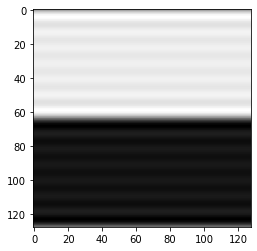

In [37]:
H = kernel_H(Img, 200)
Img_ft = My_fft2d(Img, shift=True) #正变换： FT + shift 
Img_HF = H*Img_ft # 空间滤波
Img_ift = My_ifft2d(Img_HF, shift=True) #反变换： shift + IFT 
Img_rec = np.real(Img_ift)
plt.imshow(Img_rec, cmap='gray')

### 补零操作后：


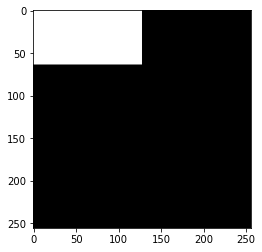

In [38]:
Img_padded = np.zeros((128*2, 128*2))
Img_padded[:128,:128] = Img
plt.imshow(Img_padded, cmap='gray')

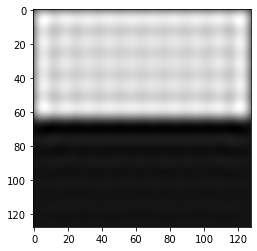

In [46]:
H_padded = kernel_H(Img_padded, 400)
Img_ft_padded = My_fft2d(Img_padded, shift=True) #正变换： FT + shift 
Img_HF_padded = H_padded*Img_ft_padded # 空间滤波
Img_ift_padded = My_ifft2d(Img_HF_padded, shift=True) #反变换： shift + IFT 
Img_rec_padded = np.real(Img_ift_padded)
plt.imshow(Img_rec_padded[:128,:128], cmap='gray')

8192.0
8192.0


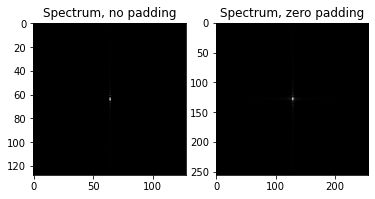

In [43]:
plt.subplot(121)
plt.imshow(abs(Img_ft), cmap='gray')
plt.title('Spectrum, no padding')
plt.subplot(122)
plt.imshow(abs(Img_ft_padded), cmap='gray')
plt.title('Spectrum, zero padding')
print(abs(Img_ft)[64,64])
print(abs(Img_ft_padded)[128,128])

## 其他填充

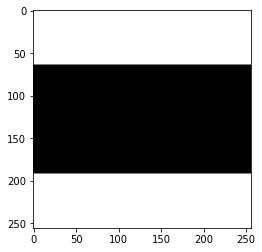

In [50]:
#镜像填充的例子
Img_padded = np.zeros((128*2, 128*2))
Img_padded[:128,:128] = Img
Img_padded[128:,:128] = Img[::-1, :]
Img_padded[:128,128:] = Img[:,::-1]
Img_padded[128:,128:] = Img[::-1, ::-1]
plt.imshow(Img_padded, cmap='gray')

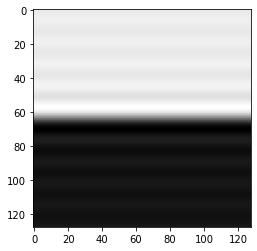

In [51]:
H_padded = kernel_H(Img_padded, 400)
Img_ft_padded = My_fft2d(Img_padded, shift=True) #正变换： FT + shift 
Img_HF_padded = H_padded*Img_ft_padded # 空间滤波
Img_ift_padded = My_ifft2d(Img_HF_padded, shift=True) #反变换： shift + IFT 
Img_rec_padded = np.real(Img_ift_padded)
plt.imshow(Img_rec_padded[:128,:128], cmap='gray')